<a href="https://colab.research.google.com/github/tanisan101/book-recommendation-system/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are several types of recommendation system like: Hybrid, Collaborative, Popularity Based and content based;
Content based Recommendation system suggests same type of content that is there, popularity based ones work on some kind of a formula are bascally suggesting the popular, trendy material; hybrid is a mix of all and collaborative is basically using the past behaviour that helps in prediction of the future consumer choices.


Collaborative Recommendation System is based on:
Refer Chat:

https://www.perplexity.ai/search/https-www-youtube-com-watch-v-fgkCppYEQBibi_NwyAaVBw

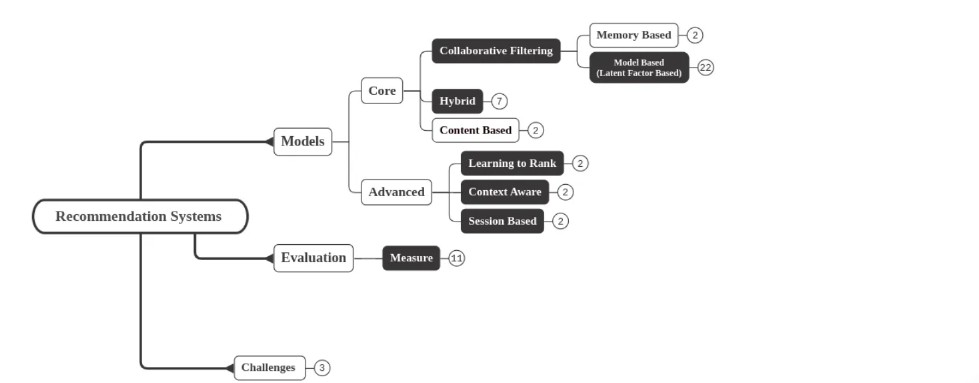



C:\Users\tanis\Downloads\archive path to the downloaded data

chatgpt chat:
https://chatgpt.com/share/680090f6-a8a4-8002-bb47-1c0b18362e66

In [95]:
import pandas as pd
import numpy as np

In [96]:
users = pd.read_csv("Users.csv")
books =  pd.read_csv("Books.csv")
ratings = pd.read_csv("Ratings.csv")

<ipython-input-96-5d1f6143620d>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books =  pd.read_csv("Books.csv")


In [97]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Problems that might have in collab filtering is-
1. Sparse matrix i.e. a lot of empty values unrated items
2. Item user matrix is going to be very large and hence we would need very efficient code for it
3. Black and Grey Sheep problems:
Black sheep being the users away from both the clusters
Grey Sheep being the users kinda in between the clusters not fitting in so the system is not sure of what to recommend it


A lot of different methods are there to do collaborative filtering but here we use Cosine Similarity.

In [98]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [99]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [100]:
users.shape

#shape attribute of the dataframe

(278858, 3)

In [101]:
books.shape



(271360, 8)

In [102]:
ratings.shape
#tells about the number of rows and number of columns
#rows, columns

(1149780, 3)

Approach according to me:
1. ill see null values, unwanted values, discrepant values and the values that i shall replace tehm from;

2. After successfully cleaning my data I'll go and look for exploratory data analysis which would further be helping me in deciding the approaches according to the things i need,

3. //Preparing the data on which i need to train my model//

4. Model Train
5. Model Test/find parameters/Deploy it.


Null and Duplicate Values

In [103]:
books.isnull().sum()


,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [104]:

users.isnull().sum()


,0
User-ID,0
Location,0
Age,110762


In [105]:
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [106]:
ratings.isnull().sum()
books.isnull().sum()
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


In [107]:
ratings.duplicated().sum()

np.int64(0)

In [108]:
users.duplicated().sum()

np.int64(0)

In [109]:
books.duplicated().sum()

np.int64(0)

Popularity Based Recommendation System


In [110]:
ratings.merge(books, on="ISBN")

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031132,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031133,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031134,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


Well here show the books with highest average rating and the books with atleast 250 or more votes

In [111]:
ratings.merge(books, on="ISBN").shape

(1031136, 10)

In [112]:
ratings_with_name = ratings.merge(books, on="ISBN")[['ISBN',	'Book-Rating',	'Book-Title',	'Book-Author', 'Year-Of-Publication',	'Publisher', 'User-ID']	]

In [113]:
ratings_with_name

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID
0,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,276725
1,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,276726
2,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,276727
3,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,276729
4,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,276729
...,...,...,...,...,...,...,...
1031131,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,276704
1031132,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,276704
1031133,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,276706
1031134,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,276709


In [114]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
#reset index adds aage the numbering

In [115]:
num_rating_df.rename(columns={'Book-Rating':'num_ratings'}, inplace=True)

In [116]:
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [117]:
num_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241071 entries, 0 to 241070
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Book-Title   241071 non-null  object
 1   num_ratings  241071 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [118]:
num_rating_df['num_ratings'].dtype


dtype('int64')

In [119]:
num_rating_df['num_ratings'] = pd.to_numeric(num_rating_df['num_ratings'], errors='coerce')


In [120]:
avg_rating_df = num_rating_df.groupby('Book-Title')['num_ratings'].mean().reset_index()
avg_rating_df.rename(columns={'num_ratings': 'avg_rating'}, inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4.0
1,Always Have Popsicles,1.0
2,Apple Magic (The Collector's series),1.0
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1.0
4,Beyond IBM: Leadership Marketing and Finance ...,1.0
...,...,...
241066,Ã?Â?lpiraten.,2.0
241067,Ã?Â?rger mit Produkt X. Roman.,4.0
241068,Ã?Â?sterlich leben.,1.0
241069,Ã?Â?stlich der Berge.,3.0


In [121]:
popularity_df = num_rating_df.merge(avg_rating_df, on='Book-Title')

In [122]:
popularity_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,4.0
1,Always Have Popsicles,1,1.0
2,Apple Magic (The Collector's series),1,1.0
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,1.0
4,Beyond IBM: Leadership Marketing and Finance ...,1,1.0
...,...,...,...
241066,Ã?Â?lpiraten.,2,2.0
241067,Ã?Â?rger mit Produkt X. Roman.,4,4.0
241068,Ã?Â?sterlich leben.,1,1.0
241069,Ã?Â?stlich der Berge.,3,3.0


In [123]:
popularity_df = popularity_df[popularity_df['num_ratings']>=500].sort_values('avg_rating', ascending=False)
popularity_df

,Book-Title,num_ratings,avg_rating
234951,Wild Animus,2502,2502.0
196326,The Lovely Bones: A Novel,1295,1295.0
183573,The Da Vinci Code,898,898.0
5303,A Painted House,838,838.0
199237,The Nanny Diaries: A Novel,828,828.0
27922,Bridget Jones's Diary,815,815.0
206502,The Secret Life of Bees,774,774.0
52983,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740,740.0
204387,The Red Tent (Bestselling Backlist),723,723.0
14392,Angels &amp; Demons,670,670.0


In [124]:
popularity_df[popularity_df['num_ratings']>=250]

,Book-Title,num_ratings,avg_rating
234951,Wild Animus,2502,2502.0
196326,The Lovely Bones: A Novel,1295,1295.0
183573,The Da Vinci Code,898,898.0
5303,A Painted House,838,838.0
199237,The Nanny Diaries: A Novel,828,828.0
27922,Bridget Jones's Diary,815,815.0
206502,The Secret Life of Bees,774,774.0
52983,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740,740.0
204387,The Red Tent (Bestselling Backlist),723,723.0
14392,Angels &amp; Demons,670,670.0


In [125]:
popularity_df['num_ratings']>=250

,num_ratings
234951,True
196326,True
183573,True
5303,True
199237,True
27922,True
206502,True
52983,True
204387,True
14392,True


In [126]:
kindoffinal = popularity_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Image-URL-M', 'num_ratings', 'avg_rating']]

In [127]:
kindoffinal

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Wild Animus,Rich Shapero,http://images.amazon.com/images/P/0971880107.0...,2502,2502.0
1,The Lovely Bones: A Novel,Alice Sebold,http://images.amazon.com/images/P/0316666343.0...,1295,1295.0
2,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.0...,898,898.0
8,A Painted House,John Grisham,http://images.amazon.com/images/P/044023722X.0...,838,838.0
13,The Nanny Diaries: A Novel,Emma McLaughlin,http://images.amazon.com/images/P/0312278586.0...,828,828.0
15,Bridget Jones's Diary,Helen Fielding,http://images.amazon.com/images/P/0330332775.0...,815,815.0
21,The Secret Life of Bees,Sue Monk Kidd,http://images.amazon.com/images/P/0142001740.0...,774,774.0
27,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,http://images.amazon.com/images/P/0060928336.0...,740,740.0
30,The Red Tent (Bestselling Backlist),Anita Diamant,http://images.amazon.com/images/P/0312195516.0...,723,723.0
31,Angels &amp; Demons,Dan Brown,http://images.amazon.com/images/P/0671027360.0...,670,670.0


In [128]:
kindoffinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 0 to 145
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book-Title   37 non-null     object 
 1   Book-Author  37 non-null     object 
 2   Image-URL-M  37 non-null     object 
 3   num_ratings  37 non-null     int64  
 4   avg_rating   37 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.7+ KB


In [129]:
kindoffinal.shape

(37, 5)

Collaborative Recommendation System

In [130]:
ratings_with_name.groupby('Book-Title').count()['Book-Rating'] > 200

,Book-Rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",False
Always Have Popsicles,False
Apple Magic (The Collector's series),False
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",False
Beyond IBM: Leadership Marketing and Finance for the 1990s,False
...,...
Ã?Â?lpiraten.,False
Ã?Â?rger mit Produkt X. Roman.,False
Ã?Â?sterlich leben.,False


In [131]:
ratings_with_name

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID
0,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,276725
1,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,276726
2,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,276727
3,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,276729
4,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,276729
...,...,...,...,...,...,...,...
1031131,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,276704
1031132,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,276704
1031133,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,276706
1031134,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,276709


In [132]:
print(list(kindoffinal.columns))

['Book-Title', 'Book-Author', 'Image-URL-M', 'num_ratings', 'avg_rating']


In [133]:
print(num_rating_df.columns.tolist())


['Book-Title', 'num_ratings']


In [134]:
print(avg_rating_df.columns.tolist())

['Book-Title', 'avg_rating']


In [135]:
import pandas as pd

ratings = pd.read_csv('Ratings.csv')
print(ratings.columns.tolist())


['User-ID', 'ISBN', 'Book-Rating']


In [136]:
print(ratings_with_name.columns.tolist())

['ISBN', 'Book-Rating', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'User-ID']


In [137]:
ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200

,Book-Rating
User-ID,
2,False
8,False
9,False
10,False
12,False
...,...
278846,False
278849,False
278851,False


In [138]:
rating_count = ratings_with_name['User-ID'].value_counts()
active_users = rating_count[rating_count > 200]
active_users

#in here we are not looking ki kitni rating di hain acchi di hain ya buri
#we are only looking for the fact that ki kitni baar user-ids show krri hai
#unki frequency kya hai taki hamein ye paat chal paye ki kaun kaun se users mostly rate krte hain vo baat aalag hai ki vo kaisa bhi rate karein

,count
User-ID,
11676,11144
198711,6456
153662,5814
98391,5779
35859,5646
...,...
164323,201
178199,201
214272,201


In [139]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
opinionated_users = x[x].index

#is a way to filter a boolean Series to show only the entries where the value is True

In [140]:
x[x]

,Book-Rating
User-ID,
254,True
2276,True
2766,True
2977,True
3363,True
...,...
274308,True
275970,True
277427,True


In [141]:
filtered_ratings = ratings_with_name[ratings_with_name['User-ID'].isin(opinionated_users)]
#amne ratings dene value user ki id jaahn jahn hai is true

In [142]:
filtered_ratings

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID
1150,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,277427
1151,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,277427
1152,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,277427
1153,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,277427
1154,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,277427
...,...,...,...,...,...,...,...
1029357,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),275970
1029358,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",275970
1029359,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,275970
1029360,4770019572,0,Musashi,Eiji Yoshikawa,1995,Kodansha International (JPN),275970


In [143]:
y = filtered_ratings.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index
famous_books
#pehle users nikale then books nikale jinhe >= 50 ratings mili


Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [144]:
final_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(famous_books)]
final_ratings

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID
1150,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,277427
1163,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,277427
1165,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,277427
1168,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,277427
1174,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,277427
...,...,...,...,...,...,...,...
1029196,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,275970
1029197,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,275970
1029270,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,275970
1029309,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,275970


In [145]:
final_ratings.drop_duplicates()

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID
1150,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,277427
1163,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,277427
1165,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,277427
1168,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,277427
1174,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,277427
...,...,...,...,...,...,...,...
1029196,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,275970
1029197,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,275970
1029270,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,275970
1029309,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,275970


In [146]:
pivot_tbl = final_ratings.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating')

In the above table users are those who have atleast given more than 250 ratings and the books are those on which atleast 50 or more ratings are given

A pivot table output typically organizes data into a structured, summarized format with grouped rows and columns, aggregated values, and optional subtotals.

In [147]:
pivot_tbl.fillna(0, inplace=True)

In [148]:
pivot_tbl

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


abhi tk ki approach kya thi ki data liya usme se opinionated users aur popular books utha ke ek pivot table bana di vahan jaha null values thi vahan 0 laaya and ab aage..

In here we have:
1. vector visualisation
2. vector Similarity: Via Distance calculation.
3. Step 3: Visualization (Dimensionality Reduction)
Compress high-dimensional vectors into 2D/3D using t-SNE or PCA

In [149]:
from sklearn.metrics.pairwise import cosine_similarity

In [150]:
similarity_scores = cosine_similarity(pivot_tbl)
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [151]:
cosine_similarity(pivot_tbl).shape

(706, 706)

663 books ki euclidian distance 663 books ke saath nikal rhe hain
each book with 663 books and so on

In [169]:
def recommend(book_name):
  #fetching index
  index = np.where(pivot_tbl.index == book_name)[0][0] #index nikala
  similar_item = sorted(list(enumerate(similarity_scores[index])), key = lambda x:x[1], reverse=True)[1:6]
  #similarity findout karenge according to the similarity scores

  for i in similar_item:
    print(pivot_tbl.index[i[0]])

 # return Terminates the Entire Function

In [166]:
np.where(pivot_tbl.index == 'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values')[0][0]

np.int64(703)

In [167]:
sorted_list = sorted(list(enumerate(similarity_scores[660])), key = lambda x:x[1], reverse=True)[0:6]
sorted_list

#kyuki enumeration kiya hai hence we dont want values sorted based on the label that we assign to it;
# so what we will do is key=lambda x:x[1] which sorts based on second element
#0:6 kiya to pehli recommendationto bookki khud hi hai

[(660, np.float64(1.0)),
 (90, np.float64(0.2864543459245013)),
 (113, np.float64(0.28152899965771144)),
 (578, np.float64(0.25837616329344654)),
 (253, np.float64(0.2502876519628831)),
 (394, np.float64(0.2470832521470153))]

Proximity is based on genre, rating, or keywords; which is directly related to euclidian distance and that to ki koi chiz kitni similar hai
cosine simialrity se similarity scores nikale hain

In [160]:
sorted_list = sorted(list(enumerate(similarity_scores[660])), key = lambda x:x[1], reverse=True)[1:6]
sorted_list

[(90, np.float64(0.2864543459245013)),
 (113, np.float64(0.28152899965771144)),
 (578, np.float64(0.25837616329344654)),
 (253, np.float64(0.2502876519628831)),
 (394, np.float64(0.2470832521470153))]

In [171]:
recommend("Message in a Bottle")

#jo database mein books hain only unka hi related books baatyeneg


Nights in Rodanthe
The Mulberry Tree
A Walk to Remember
River's End
Nightmares &amp; Dreamscapes


reflect ki kya kiya exactluyy pura and model train ? what is moduul and q and a?
